In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Attribute Information:

### Output features

1. price - price in US dollars ($326-$18,823) 

### Input featrues

2. carat - weight of the diamond (0.2--5.01)

3. cut - quality of the cut (Fair, Good, Very Good, Premium, Ideal)

4. color - diamond colour, from J (worst) to D (best)

5. clarity - a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

6. x - length in mm (0--10.74)

7. y -  width in mm (0--58.9)

8. z - depth in mm (0--31.8)

- depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

- table width of top of diamond relative to widest point (43--95)

In [2]:
diamond = pd.read_csv("diamonds.csv")
diamond

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
diamond = diamond.drop(columns=["Unnamed: 0","color","clarity","depth","table","x","y","z"])
diamond

,carat,cut,price
0,0.23,Ideal,326
1,0.21,Premium,326
2,0.23,Good,327
3,0.29,Premium,334
4,0.31,Good,335
...,...,...,...
53935,0.72,Ideal,2757
53936,0.72,Good,2757
53937,0.70,Very Good,2757
53938,0.86,Premium,2757


In [4]:
diamond.shape

(53940, 3)

In [5]:
diamond = diamond.sample(2500,random_state=0)
diamond

,carat,cut,price
10176,1.10,Ideal,4733
16083,1.29,Ideal,6424
13420,1.20,Premium,5510
20407,1.50,Ideal,8770
8909,0.90,Very Good,4493
...,...,...,...
44724,0.53,Ideal,1615
33446,0.32,Ideal,828
6274,1.00,Premium,4014
35523,0.43,Very Good,905


In [6]:
import sklearn.cluster as skc
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [7]:
diamond

,carat,cut,price
10176,1.10,Ideal,4733
16083,1.29,Ideal,6424
13420,1.20,Premium,5510
20407,1.50,Ideal,8770
8909,0.90,Very Good,4493
...,...,...,...
44724,0.53,Ideal,1615
33446,0.32,Ideal,828
6274,1.00,Premium,4014
35523,0.43,Very Good,905


In [8]:
# Enocde Data 
categorial_col = ["cut"]

#Label Encoder
le = LabelEncoder()
for col in categorial_col:
    diamond[col] = le.fit_transform(diamond[col])
diamond

,carat,cut,price
10176,1.10,2,4733
16083,1.29,2,6424
13420,1.20,3,5510
20407,1.50,2,8770
8909,0.90,4,4493
...,...,...,...
44724,0.53,2,1615
33446,0.32,2,828
6274,1.00,3,4014
35523,0.43,4,905


In [9]:
diamond.head()

,carat,cut,price
10176,1.10,2,4733
16083,1.29,2,6424
13420,1.20,3,5510
20407,1.50,2,8770
8909,0.90,4,4493


In [10]:
X = diamond.drop(columns=["cut"])
X

,carat,price
10176,1.10,4733
16083,1.29,6424
13420,1.20,5510
20407,1.50,8770
8909,0.90,4493
...,...,...
44724,0.53,1615
33446,0.32,828
6274,1.00,4014
35523,0.43,905


In [11]:
y = diamond["cut"]
y.head(50)

10176    2
16083    2
13420    3
20407    2
8909     4
35890    2
32334    4
513      2
27680    3
43597    2
47609    2
36246    2
47546    2
36801    3
2083     1
26668    3
36732    2
19772    2
20297    0
52785    2
411      2
27597    2
19937    2
37486    3
34299    4
49118    2
33940    2
38915    2
30528    4
39240    4
13228    3
40260    3
29234    2
48104    3
47026    3
40398    2
23510    3
28550    3
41595    2
46599    2
27076    3
28078    2
48421    1
10192    4
5113     2
12829    0
42311    2
34007    2
27812    2
33132    3
Name: cut, dtype: int32

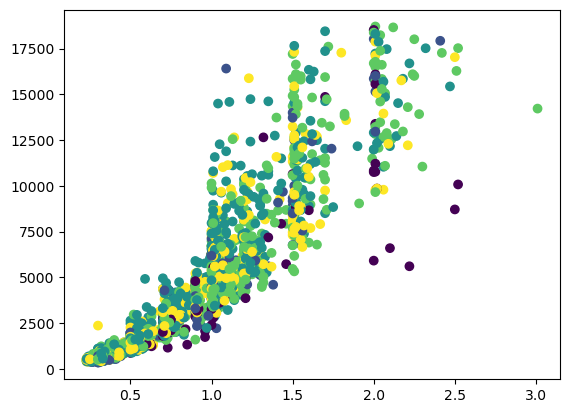

In [12]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)

In [15]:
y_train

31451    2
31485    3
48427    2
24634    3
41392    3
        ..
14234    2
11693    4
43744    4
20920    3
38292    4
Name: cut, Length: 1675, dtype: int32

In [16]:
X_train

,carat,price
31451,0.34,765
31485,0.34,765
48427,0.57,1972
24634,2.18,12970
41392,0.42,1221
...,...,...
14234,0.96,5767
11693,1.01,5067
43744,0.51,1438
20920,1.18,9137


In [17]:
X_test

,carat,price
20986,1.20,9203
5599,0.85,3871
18106,1.33,7325
25773,1.24,14737
14487,1.15,5851
...,...,...
29198,0.44,694
13763,1.35,5610
11536,1.01,5028
9291,1.12,4570


In [18]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X_train)
scaled_X

array([[-0.98275848, -0.8030705 ],
       [-0.98275848, -0.8030705 ],
       [-0.4708359 , -0.47989959],
       ...,
       [-0.60438092, -0.62287661],
       [ 0.88687183,  1.43850933],
       [-1.11630351, -0.87750423]])

C:\Users\msura\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


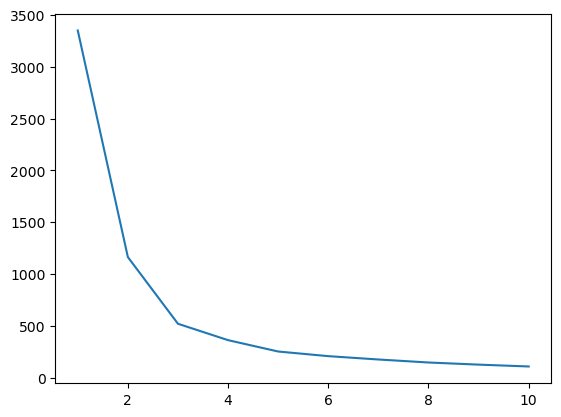

In [19]:
def BestKPlot(data,num=11):
    collect=[]
    for i in range(1,num):
        means=skc.KMeans(n_clusters=i).fit(data)
        sqr=means.inertia_
        collect.append(sqr)
    plt.plot(range(1,num),collect)
    plt.show()
    
BestKPlot(scaled_X)

In [20]:
from sklearn.cluster import KMeans

In [21]:
## Elbow method to select the K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_) 

C:\Users\msura\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


In [22]:
wcss

[23364948836.31242,
 7332154409.481208,
 2977375323.401754,
 1705976512.5452194,
 1088462966.3583908,
 715693409.9363192,
 500893099.3813758,
 389153382.14964086,
 311321524.1731663,
 245385486.37950864]

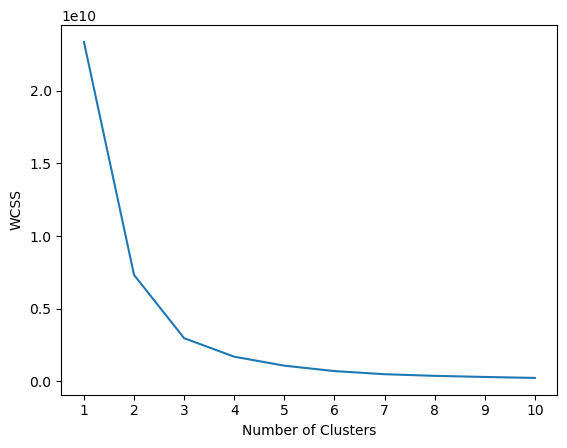

In [23]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [24]:
## Silhoutte Score
from sklearn.metrics import silhouette_score

In [25]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [26]:
score

0.5996175418056988

In [27]:
silhouette_coefficients

[0.6827459476287024,
 0.6677477390715815,
 0.649681604485047,
 0.6189196904313038,
 0.6128410275214391,
 0.6207593608052311,
 0.6077257323986189,
 0.606898895102758,
 0.5996175418056988]

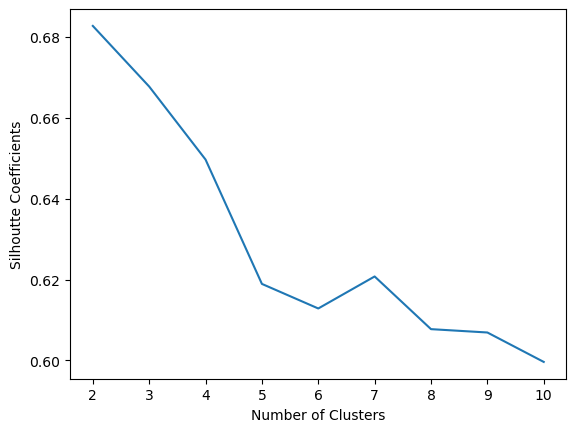

In [28]:
## Plotting silhoutte coffcients 
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel('Silhoutte Coefficients')
plt.show()

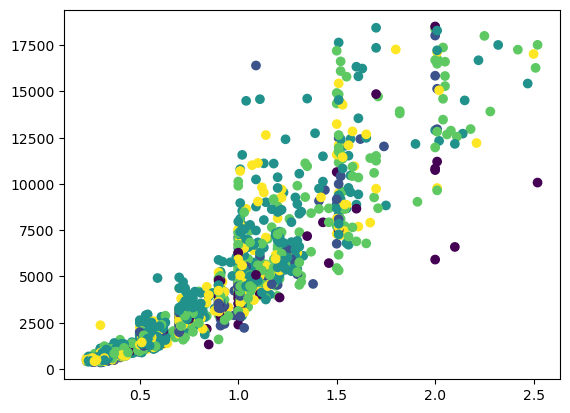

In [29]:
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1],c=y_train)

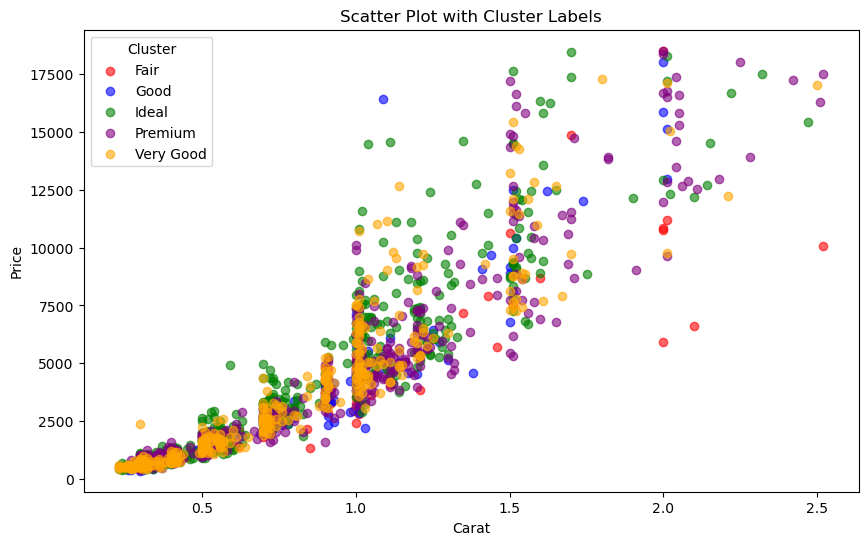

In [30]:
cluster_labels = ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']

# Define colors for each cluster
colors = ['red', 'blue', 'green', 'purple', 'orange']

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot each cluster with its own color and label
for cluster in range(len(cluster_labels)):
    cluster_data = X_train[y_train == cluster]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], 
                color=colors[cluster], label=cluster_labels[cluster], alpha=0.6)

# Add labels and title
plt.xlabel('Carat')
plt.ylabel("Price")
plt.title('Scatter Plot with Cluster Labels')

# Add the legend
plt.legend(title='Cluster')

# Show the plot
plt.show()

In [31]:
kmeans=KMeans(n_clusters=5,init='k-means++')

In [32]:
kmeans

KMeans(n_clusters=5)

In [33]:
kmeans.fit_predict(scaled_X)

array([3, 3, 3, ..., 3, 4, 3])

In [34]:
y_label= kmeans.fit_predict(X_test)

In [35]:
y_label

array([1, 2, 4, 3, 4, 0, 3, 1, 0, 0, 0, 0, 3, 0, 0, 0, 4, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 4, 2, 2, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1,
       0, 2, 0, 0, 0, 2, 3, 0, 4, 0, 4, 2, 2, 0, 0, 4, 3, 2, 2, 0, 0, 0,
       2, 0, 4, 4, 4, 0, 0, 0, 4, 2, 2, 0, 0, 2, 2, 3, 2, 2, 0, 3, 2, 0,
       4, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 4, 2, 0, 1, 1, 0, 0, 2,
       0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 4, 0, 0, 2, 2, 0, 2, 3, 2, 1, 0, 0,
       4, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 4, 0, 2, 0, 0, 3, 0, 4, 0, 2,
       0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 2, 1, 0, 2, 0, 2, 0, 0, 1, 0, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 3, 3, 4, 0, 0, 0, 4, 0, 0, 2, 2, 2, 0, 0, 2,
       2, 2, 0, 2, 4, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 3, 0, 4,
       1, 0, 4, 2, 0, 0, 4, 0, 2, 4, 4, 0, 1, 3, 2, 2, 0, 3, 2, 0, 0, 0,
       2, 0, 0, 4, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 3, 0, 2, 0, 2, 4,
       1, 0, 0, 2, 0, 2, 3, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 2,
       0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 4, 0,

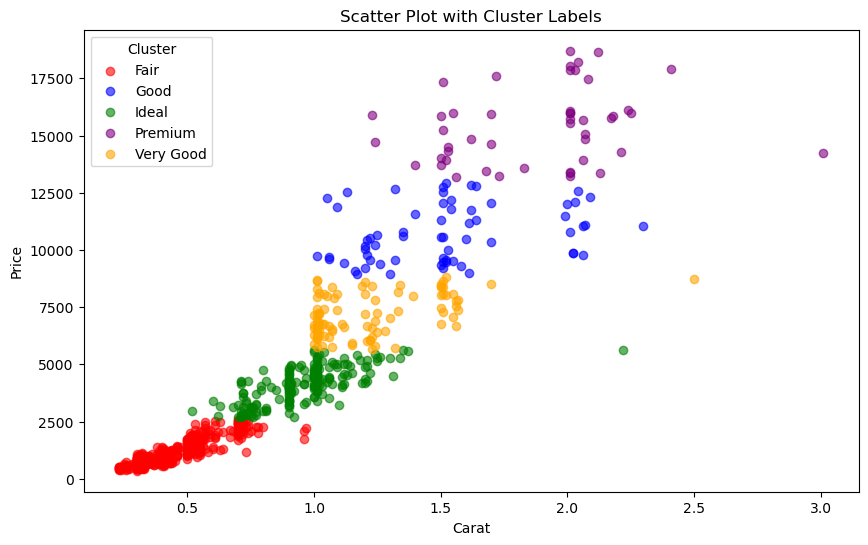

In [36]:
cluster_labels = ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']

# Define colors for each cluster
colors = ['red', 'blue', 'green', 'purple', 'orange']

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot each cluster with its own color and label
for cluster in range(len(cluster_labels)):
    cluster_data = X_test[y_label == cluster]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], 
                color=colors[cluster], label=cluster_labels[cluster], alpha=0.6)

# Add labels and title
plt.xlabel('Carat')
plt.ylabel("Price")
plt.title('Scatter Plot with Cluster Labels')

# Add the legend
plt.legend(title='Cluster')

# Show the plot
plt.show()